In [1]:
import json, glob, pycm, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from operator import itemgetter
from IPython.display import display, Markdown

In [2]:
def experiment_df(experiments):
    df = pd.DataFrame.from_records([ 
    { 
        "name": experiment["concept"]['label'], 
        "kappa": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Kappa,
        "SOA9": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).SOA9,
        "ACC": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Overall_ACC,
        "FP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FP["positive"],
        "FN": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FN["positive"],
        "POP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).POP["positive"],
        "experiment": experiment,
    }
    for experiment in experiments if "confusion_matrix" in experiment and pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Kappa != 'None' ]).sort_values("kappa", ascending=False)
    return df

In [3]:
wd_v6 = experiment_df(json.load(open('../experiments/wd_gpt-4_label_results.json')))
wd_v4 = experiment_df(json.load(open('../experiments/wd_gpt-4_serialization_from_wikidata_results.json')))
wd_v3 = experiment_df(json.load(open('../experiments/wd_gpt-4_description_from_wikipedia_results.json')))
caligraph_v2 = experiment_df(json.load(open('../experiments/caligraph_gpt-4_label_results.json')))
caligraph_v3 = experiment_df(json.load(open('../experiments/caligraph_gpt-4_serialization_results.json')))
caligraph_v4 = experiment_df(json.load(open('../experiments/caligraph_gpt-3.5-turbo_serialization_results.json')))
caligraph_v5 = experiment_df(json.load(open('../experiments/caligraph_gpt-4_description_results.json')))

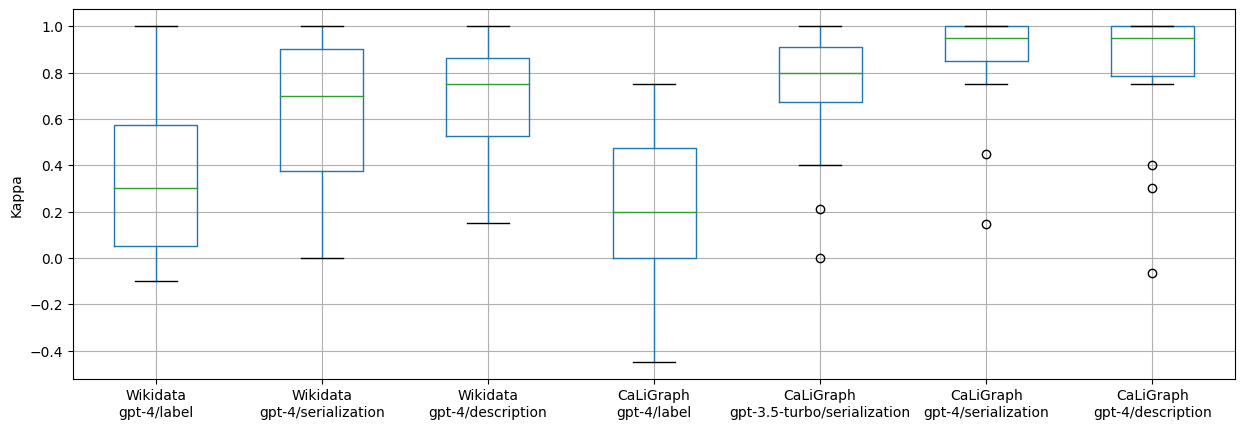

In [4]:
df = pd.concat([wd_v6["kappa"], wd_v4["kappa"], wd_v3["kappa"], caligraph_v2["kappa"], caligraph_v4["kappa"], caligraph_v3["kappa"], caligraph_v5["kappa"]], axis=1, ignore_index=True)
df.reset_index()
df = df.set_axis(["Wikidata\ngpt-4/label", "Wikidata\ngpt-4/serialization", "Wikidata\ngpt-4/description", "CaLiGraph\ngpt-4/label", "CaLiGraph\ngpt-3.5-turbo/serialization", "CaLiGraph\ngpt-4/serialization", "CaLiGraph\ngpt-4/description"], axis=1)
plot = df.boxplot(return_type='axes')
plot.figure.set_figwidth(15)
plot.set_ylabel('Kappa')
plt.show(plot)

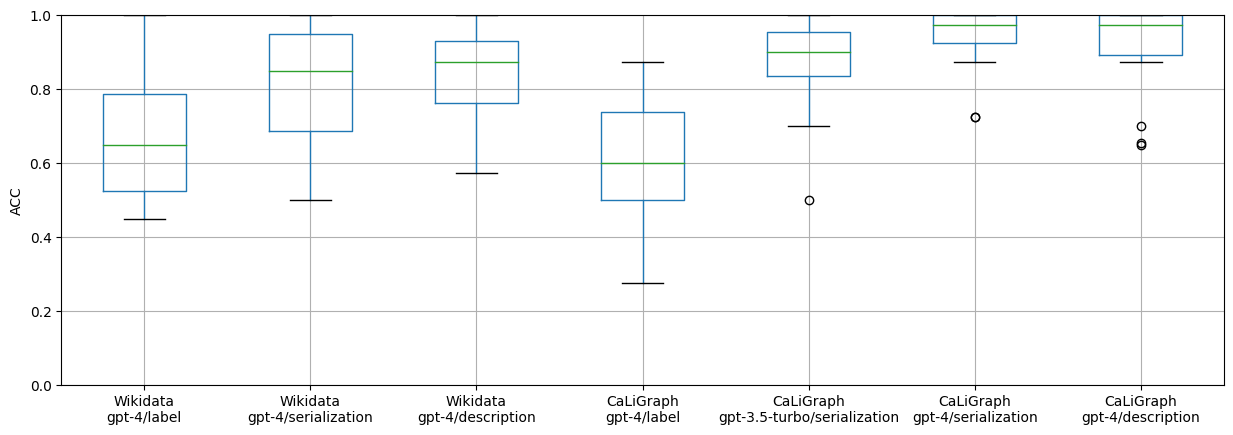

In [5]:
df = pd.concat([wd_v6["ACC"], wd_v4["ACC"], wd_v3["ACC"], caligraph_v2["ACC"], caligraph_v4["ACC"], caligraph_v3["ACC"], caligraph_v5["ACC"]], axis=1, ignore_index=True)
df.reset_index()
df = df.set_axis(["Wikidata\ngpt-4/label", "Wikidata\ngpt-4/serialization", "Wikidata\ngpt-4/description", "CaLiGraph\ngpt-4/label", "CaLiGraph\ngpt-3.5-turbo/serialization", "CaLiGraph\ngpt-4/serialization", "CaLiGraph\ngpt-4/description"], axis=1)
plot = df.boxplot(return_type='axes')
plot.figure.set_figwidth(15)
plot.set_ylabel('ACC')
plot.set_ylim(0.0, 1.0)
plt.show(plot)